## Data Analysis and Visualization

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 11)

In [6]:
len(df['Unnamed: 0'].unique().tolist())

53940

In [7]:
df.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df.set_index('index',inplace=True)

In [8]:
print(df.columns)
df.head()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [11]:
df['Volume']=df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
index,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [12]:
df.drop(['x','y','z'],axis=1,inplace=True)

In [13]:
df['clarity'].value_counts().to_frame()

,clarity
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [14]:
%%capture
! pip install seaborn

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

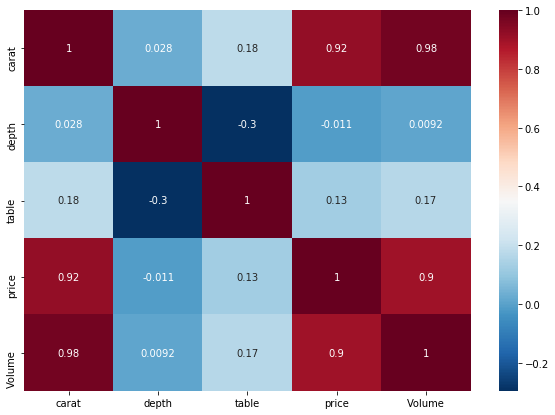

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="RdBu_r")

In [17]:
df[['carat','Volume','price']].corr()

,carat,Volume,price
carat,1.000000,0.976308,0.921591
Volume,0.976308,1.000000,0.902385
price,0.921591,0.902385,1.000000


(0, 4)

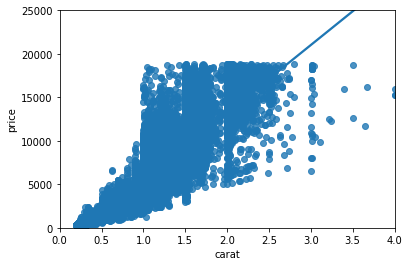

In [18]:
sns.regplot(x='carat',y='price',data=df)
plt.ylim(0,25000)
plt.xlim(0,4)

(0, 1000)

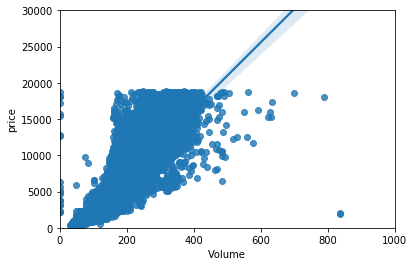

In [19]:
sns.regplot(x='Volume',y='price',data=df)
plt.ylim(0,30000)
plt.xlim(0,1000)

In [20]:
from scipy import stats

In [21]:
#Finding correlation between carat and price in the dataframe with pearsons coefficient and p-value

pearson_coef, p_value = stats.pearsonr(df['carat'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9215913011934769  with a P-value of P = 0.0


In [22]:
#Finding correlation between Volume and price in the dataframe with pearsons coefficient and p-value

pearson_coef, p_value = stats.pearsonr(df['Volume'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9023845363055313  with a P-value of P = 0.0


### Linear Regression

In [24]:
#Collecting X and Y 
# FOR VOLUME AND PRICE CORRELATION APPLYING LINEAR REGRESSION
X=df['Volume'].values
Y=df['price'].values

In [25]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

n=len(X)

numerator=0
denominator=0
for i in range(n):
    numerator += (X[i]-mean_x)*(Y[i]-mean_y)
    denominator += (X[i]-mean_x)**2

m=numerator/denominator
c=mean_y-(m*mean_x)

print("m =",m,"  c =",c)

m = 46.009287399367544   c = -2041.4787948425833


In [26]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred=m*X[i]+c
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print("R-Square value is",r2)

R-Square value is 0.8142978513633429


In [27]:
#Collecting X and Y 
# FOR CARAT AND PRICE CORRELATION APPLYING LINEAR REGRESSION
X=df['carat'].values
Y=df['price'].values

In [28]:
mean_x=np.mean(X)
mean_y=np.mean(Y)

n=len(X)

numerator=0
denominator=0
for i in range(n):
    numerator += (X[i]-mean_x)*(Y[i]-mean_y)
    denominator += (X[i]-mean_x)**2

m=numerator/denominator
c=mean_y-(m*mean_x)

print("m =",m,"  c =",c)

m = 7756.425617967361   c = -2256.360580044546


In [29]:
ss_t=0
ss_r=0
for i in range(n):
    y_pred=m*X[i]+c
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print("R-Square value is",r2)

R-Square value is 0.8493305264354793


### Linear regression Using Scikit Learn

In [23]:
# APPLYING LINEAR REGRESSION USING SCIKIT LEARN FOR CARAT VS PRICE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn import metrics

#Cannot use Rank 1 matrix in sklearn
# X=X.reshape(n,1)

# #Creating model
# reg=LinearRegression()

# #Fitting training data
# reg=reg.fit(X,Y)

# #Y Prediction
# Y_pred=reg.predict(X)

# #Calculating R2 Score
# r2_score=reg.score(X,Y)

# print("R-Square value is",r2_score)
x=df[['carat','Volume']].values
y=df['price'].values

In [24]:
reg=LinearRegression()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [42]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
coeff_df=pd.DataFrame(reg.coef_, ['carat','Volume'], columns=['Coefficient'])  
coeff_df

,Coefficient
carat,7502.307033
Volume,1.557299


In [43]:
y_pred=reg.predict(x_test)

In [44]:
check=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check.head(10)

,Actual,Predicted
0,4733,6277.473620
1,6424,7748.309506
2,5510,7050.901702
3,8770,9380.275540
4,4493,4723.604265
5,918,226.522241
6,789,70.842555
7,2823,2483.084753
8,18705,13332.283862
9,507,149.374373


In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1013.0045950368935
Mean Squared Error: 2430181.698322852
Root Mean Squared Error: 1558.9040054868203


# ---------------------------------------------------------------------------------------------------------------

### Trying KNN algorithm

In [56]:
#Adding Scikit Leran libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [57]:
df.head()

,carat,cut,color,clarity,depth,table,price,Volume
index,,,,,,,,
1,0.23,5,E,SI2,61.5,55.0,326,38.202030
2,0.21,4,E,SI1,59.8,61.0,326,34.505856
3,0.23,2,E,VS1,56.9,65.0,327,38.076885
4,0.29,4,I,VS2,62.4,58.0,334,46.724580
5,0.31,2,J,SI2,63.3,58.0,335,51.917250


In [59]:
df['cut'].replace({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, inplace=True)
print(df['cut'].value_counts())

In [60]:
x=df[['carat','cut','Volume']]
y=df.price
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [61]:
# Feature Scaling
# RULE OF THUMB: Any algorithm that computes distance or assumes normality, scale your features
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [62]:
# Define the model: K-NN init
reg=KNeighborsRegressor(n_neighbors=11, p=2, metric='euclidean')

In [63]:
reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [64]:
y_pred=reg.predict(x_test)

In [65]:
check=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check.head(10)

,Actual,Predicted
index,,
10177,4733,5341.363636
16084,6424,8584.090909
13421,5510,5690.909091
20408,8770,11720.818182
8910,4493,4038.636364
35891,918,839.818182
32335,789,546.636364
514,2823,2347.090909
27681,18705,14715.454545


In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 799.8641992786598
Mean Squared Error: 2002426.5343372035
Root Mean Squared Error: 1415.0712117548019


## -----------------------------------------------------------------------------------------------------------

In [62]:
x=df.carat
y=df.price
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)
check=[[x_train,y_train]]
check

[[index
  442      0.89
  50333    0.70
  35653    0.31
  9440     0.90
  15825    1.01
           ... 
  45892    0.52
  52417    0.70
  42614    0.32
  43568    0.41
  2733     0.91
  Name: carat, Length: 40455, dtype: float64,
  index
  442      2815
  50333    2242
  35653     907
  9440     4592
  15825    6332
           ... 
  45892    1720
  52417    2512
  42614     505
  43568    1431
  2733     3246
  Name: price, Length: 40455, dtype: int64]]

In [2]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def main():
    '''
    # Regression Data
    # 
    # Column 0: height (inches)
    # Column 1: weight (pounds)
    '''
    reg_data = [
       x_train, y_train
    ]
    
    # Question:
    # Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
    reg_query = [60]
    reg_k_nearest_neighbors, reg_prediction = knn(
        reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
    )
    print(reg_prediction)
    
    '''
    # Classification Data
    # 
    # Column 0: age
    # Column 1: likes pineapple
    '''
#     clf_data = [
#        [22, 1],
#        [23, 1],
#        [21, 1],
#        [18, 1],
#        [19, 1],
#        [25, 0],
#        [27, 0],
#        [29, 0],
#        [31, 0],
#        [45, 0],
#     ]
#     # Question:
#     # Given the data we have, does a 33 year old like pineapples on their pizza?
#     clf_query = [33]
#     clf_k_nearest_neighbors, clf_prediction = knn(
#         clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
#     )

if __name__ == '__main__':
    main()

128.24666666666667
